In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.interpolate import griddata

mpl.font_manager.fontManager.addfont('/opt/localdata/Data/bea/nlp/bmi550/assignment2/Tinos-Regular.ttf')
mpl.rc('font', family='Tinos')

In [4]:
log_path = "./roberta_opt_3.json"

# open the log file
opt_df = pd.read_json(log_path, lines=True)
opt_df

,final,params,test_loss,test_acc,test_auc,test_f1,test_prec,test_rec
0,False,"{'dropout_proportion': 0.722161928459056, 'lea...",1.470983,0.630435,0.763383,0.630435,0.630435,0.630435
1,False,"{'dropout_proportion': 0.7594228261290941, 'le...",0.874960,0.630435,0.811406,0.630435,0.630435,0.630435
2,False,"{'dropout_proportion': 0.8780808911239141, 'le...",0.815646,0.630435,0.741424,0.630435,0.630435,0.630435
3,False,"{'dropout_proportion': 0.587233970209022, 'lea...",0.820581,0.652174,0.814385,0.652174,0.652174,0.652174
4,False,"{'dropout_proportion': 0.722161928459056, 'lea...",0.886122,0.668478,0.766608,0.668478,0.668478,0.668478
...,...,...,...,...,...,...,...,...
100,False,"{'dropout_proportion': 0.859257189067353, 'lea...",1.029170,0.635870,0.745791,0.635870,0.635870,0.635870
101,False,"{'dropout_proportion': 0.40345124747482103, 'l...",0.909637,0.635870,0.788794,0.635870,0.635870,0.635870
102,False,"{'dropout_proportion': 0.35551881473179203, 'l...",0.772177,0.684783,0.816818,0.684783,0.684783,0.684783
103,False,"{'dropout_proportion': 0.669794530938097, 'lea...",0.829582,0.603261,0.743785,0.603261,0.603261,0.603261


In [5]:
opt_df.sort_values("test_f1", ascending=False)

,final,params,test_loss,test_acc,test_auc,test_f1,test_prec,test_rec
104,True,"{'dropout_proportion': 0.613290675807255, 'lea...",1.617058,0.695652,0.755069,0.695652,0.695652,0.695652
8,False,"{'dropout_proportion': 0.613290675807255, 'lea...",1.617058,0.695652,0.755069,0.695652,0.695652,0.695652
43,False,"{'dropout_proportion': 0.6133195752175781, 'le...",0.736314,0.690217,0.831702,0.690217,0.690217,0.690217
102,False,"{'dropout_proportion': 0.35551881473179203, 'l...",0.772177,0.684783,0.816818,0.684783,0.684783,0.684783
53,False,"{'dropout_proportion': 0.6133367007643461, 'le...",1.037688,0.684783,0.788931,0.684783,0.684783,0.684783
...,...,...,...,...,...,...,...,...
56,False,"{'dropout_proportion': 0.10697501900221901, 'l...",1.860325,0.597826,0.651944,0.597826,0.597826,0.597826
49,False,"{'dropout_proportion': 0.10699709062580501, 'l...",0.959268,0.597826,0.621684,0.597826,0.597826,0.597826
77,False,"{'dropout_proportion': 0.603842742235151, 'lea...",1.499113,0.581522,0.741476,0.581522,0.581522,0.581522
21,False,"{'dropout_proportion': 0.48390671319710604, 'l...",0.963560,0.554348,0.483527,0.554348,0.554348,0.554348


In [6]:
# extract the best performing parameters based on the monitor metric
best_idx = opt_df["test_f1"].idxmax()
best_param_dict = opt_df.loc[best_idx, 'params']
best_param_dict

{'dropout_proportion': 0.613290675807255,
 'learning_rate': 7.222962112874302e-05}

In [7]:
opt_df.loc[opt_df.final == True, :]

,final,params,test_loss,test_acc,test_auc,test_f1,test_prec,test_rec
104,True,"{'dropout_proportion': 0.613290675807255, 'lea...",1.617058,0.695652,0.755069,0.695652,0.695652,0.695652


In [16]:
def visualize_v2(x_var: str, y_var: str, z_var: str, df, n: complex = 100j, method: str = 'cubic', best_param_dict: dict or None = None):
    """
    method can be 'linear', 'cubic', or 'nearest'
    """
    var_list = []
    n_list = []
    for var_name in [x_var, y_var]:
        # if variable is 'penalty', convert it to categorical
        var_list.append([d[var_name] for d in df['params']])
        n_list.append(n)
    
    # unpack var_list and n_list
    x_list, y_list = var_list
    x_n, y_n = n_list
    
    # create a grid to interpolate over
    grid_x, grid_y = np.mgrid[min(x_list):max(x_list):x_n, min(y_list):max(y_list):y_n]

    z_list = list(df[z_var])
#     print(z_list)
#     z_list = np.clip(z_list, 0.0, 1.0)

    # interpolate with griddata
    grid_z = griddata((x_list, y_list), z_list, (grid_x, grid_y), method=method, fill_value=0.0)

    fig, ax = plt.subplots(1, 1, dpi=150)
    
    # plot the interpolated data as a density map
    density_map = ax.imshow(
        grid_z.T, 
        extent=(
            min(x_list), 
            max(x_list), 
            min(y_list), 
            max(y_list)
        ), 
        origin='lower', 
        aspect='auto', 
        cmap='viridis',
#         interpolation='gaussian'
    )
    # plt.scatter(x_list, y_list, s=[(z**2)*10 for z in z_list])
    
    if best_param_dict is not None:
        ax.scatter(
            best_param_dict[x_var], 
            best_param_dict[y_var], 
            c='red', 
            marker='x', 
            label="Best Parameters"
        )
        ax.legend()
        

    x_title = x_var.replace('_', ' ').title()
    y_title = y_var.replace('_', ' ').title()
    
    plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)
    
    # plt.yscale('decimal')
    fig.colorbar(density_map, label='F1 Score', ax=ax)
    ax.set_xlabel(x_title)
    ax.set_ylabel(y_title)
    ax.set_title(f'Heatmap of {x_title} vs {y_title}')
    plt.show()
    

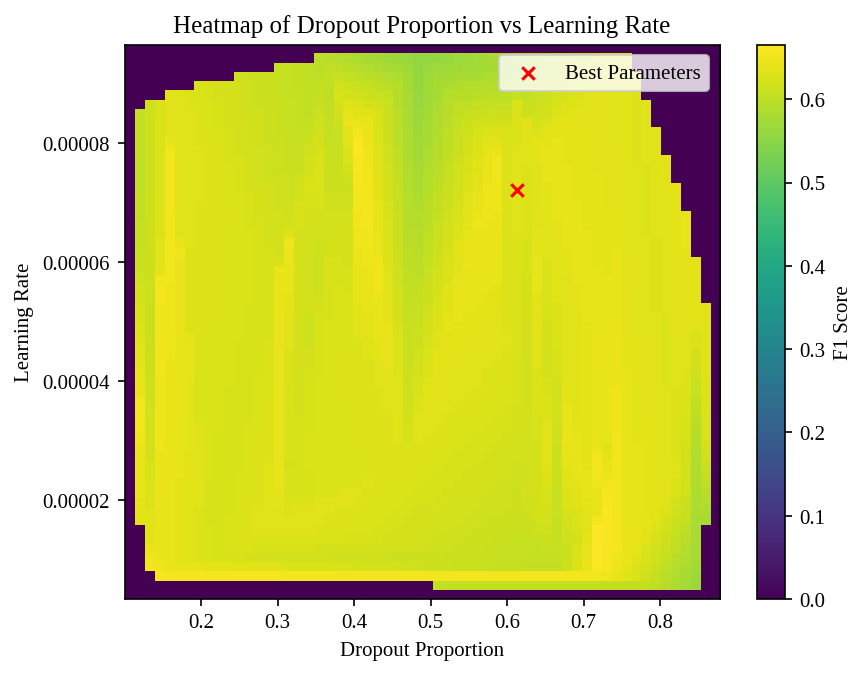

In [17]:
visualize_v2(
    'dropout_proportion', 
    'learning_rate', 
    'test_f1', 
    opt_df[opt_df.final == False], 
    n=60j,
    method='linear',
    best_param_dict=best_param_dict
)